# Project 2: Handwritten Digit Recognition with a Simple CNN

### Team: 
    Scott Mayer
    Sarafina Gonzalez

## Project Overview

This project focuses on the development and understanding of a Convolutional Neural Network (CNN) for recognizing handwritten digits using the MNIST dataset. It is structured to provide a comprehensive introduction to deep learning techniques and their practical applications. Participants will engage in:

* **Setting up a Python project environment**, emphasizing the importance of virtual environments for effective dependency management in machine learning initiatives.
* **Performing data collection and preprocessing**, which includes normalization, reshaping, and batching of image data, essential steps for the successful application of machine learning models.
* **Designing and refining a CNN architecture**, where participants will gain hands-on experience in neural network design, layer configuration, and model compilation specific to image recognition tasks.
* **Conducting model training and evaluation**, teaching participants to apply training procedures, assess performance metrics, and gauge model accuracy on test data.
* **Executing results analysis and model optimization**, aimed at enhancing model performance through methods such as hyperparameter tuning and data augmentation, while mitigating common issues like overfitting.
* **Preparing the model for deployment**, which covers model conversion for production environments, development of an interaction interface, and comprehensive project documentation for future scalability and reproducibility.

The project aims to build proficiency in utilizing TensorFlow and Keras, equipping participants with the necessary skills to develop, train, and deploy effective machine learning models. Emphasis is placed on following best practices for machine learning project workflows, from data preprocessing to deployment, ensuring participants are well-prepared to handle a variety of data science challenges.

**Estimated Completion Time**

12 to 14 hours


## Task 1: Project Setup and Environment Preparation

**Objective:** Set up the project environment and install necessary libraries to ensure a smooth workflow.

**Activities:**

1. Install Python and necessary libraries (NumPy, TensorFlow/Keras, Matplotlib, etc.).
2. Set up a virtual environment for the project to manage dependencies.
3. Verify the installation by running a simple Python script.

**Estimated Completion Time:** 60 minutes

### Imports

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.optimizers import SGD
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import datetime 

from hyperopt import hp 
from hyperopt import tpe, Trials, fmin
from hyperopt import STATUS_OK

import mlflow
import mlflow.tensorflow
import tensorflow as tf

import os

### Check for GPU Support

In [48]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Task 2: Data Collection and Preprocessing  

**Objective:** Gather and prepare the handwritten digits data for training and testing the CNN.  

**Activities:**  
1. Download the MNIST dataset.  
2. Normalize the image pixel values and reshape them for the CNN.  
3. Split the data into training, validation, and testing sets.  
4. Perform data augmentation to increase the diversity of the training set (e.g., rotations, translations).  
5. Implement data loaders for efficient loading and batching operations during training.  
6. Visualize the augmented images to verify the data augmentation process.  
7. Save the preprocessed data for easy access in subsequent training sessions.

**Estimated Completion Time:** 180 minutes

**Hints:**

  1. Use TensorFlow's Keras API to import the MNIST dataset. This dataset is directly accessible through `tensorflow.keras.datasets`.
  2. Load the dataset using `mnist.load_data()`, which automatically splits it into training and test sets. These sets include both the images (handwritten digits) and their corresponding labels.
  3. Normalize the pixel values of both training and test images from integers in the range 0-255 to floats in the range 0-1. This step is crucial for neural network models as it helps in faster convergence.
  4. Reshape the images to ensure they are in the correct format for the CNN. This typically involves adding a channel dimension, indicating that the images are grayscale.
  5. Utilize `train_test_split` from scikit-learn to divide the original training images and labels into a new training set and a validation set. A common split percentage for validation is 10% of the training set.
  6. Instantiate an `ImageDataGenerator` with parameters defining the types of transformations (e.g., rotations, shifts, zoom) to apply to the images. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
  7. This process artificially expands the dataset with modified versions of the original images, helping the model learn from a more varied dataset.
  8. Use the `flow` method of the previously created `ImageDataGenerator` to create a training generator. Specify the batch size for how many images to process at a time.
  9. Create a similar generator for the validation data. Note that data augmentation is typically only applied to the training data, not the validation data.
  10. Generate a batch of augmented images using the training generator.
  11. Plot a subset of these images to visually inspect the applied augmentations, ensuring they are realistic and beneficial for training.
  12. Use `np.savez_compressed` to save the training, validation, and test sets to a compressed `.npz` file. This method is efficient for storage and quick to load, making it ideal for large datasets.

**Additional Insights:**
- Carefully choosing data augmentation techniques and parameters is crucial. Over-augmenting the data can introduce unrealistic variations, potentially harming the model's ability to learn.
- Validating the preprocessing and augmentation steps through visualization ensures that the data remains meaningful and representative of the task at hand.
- Efficient data loading and preprocessing are foundational to training deep learning models, especially when dealing with large datasets or computationally intensive models.


### Task 2.1: Load the data 

In [4]:
# Load and split data into test and train sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Check shape
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


We have 60,000 images of size 28x28 pixels in the training set and 10,000 images of the same size in the test set.

### Task 2.2: Normalize the images 

In [5]:
# Scale images 
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# Reshape images 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[1], 1) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[1], 1)

# Check reshaping
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In scaling, we changed the pixel values from integers in the range 0-255 to floats in the range 0-1. In reshaping, we added 1 channel as to indicate the images are grayscale.

### Task 2.3: Split Data into training and testing set

In [7]:
# Split train set into train and validation 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1)

# Check shape 
print (X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(54000, 28, 28, 1) (54000,) (6000, 28, 28, 1) (6000,)


We already split the data into test and train sets when loading the data. Here, we are splitting 10% of the training set to make a validation set. The shape of the train set went from 60,000 images to 54,000, which verifies that 10% (6,000 images) went to the validation set.

### Task 2.4: Perform data augmentation

In [8]:
# Instantiate the ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=.2, height_shift_range=.2, zoom_range=.2)
# Fit it on our training data
datagen.fit(X_train)

### Task 2.5: Implement data loaders

In [9]:
# Configure batch size
batch_size = 64 
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size)

### Task 2.6: Visualize augmented images

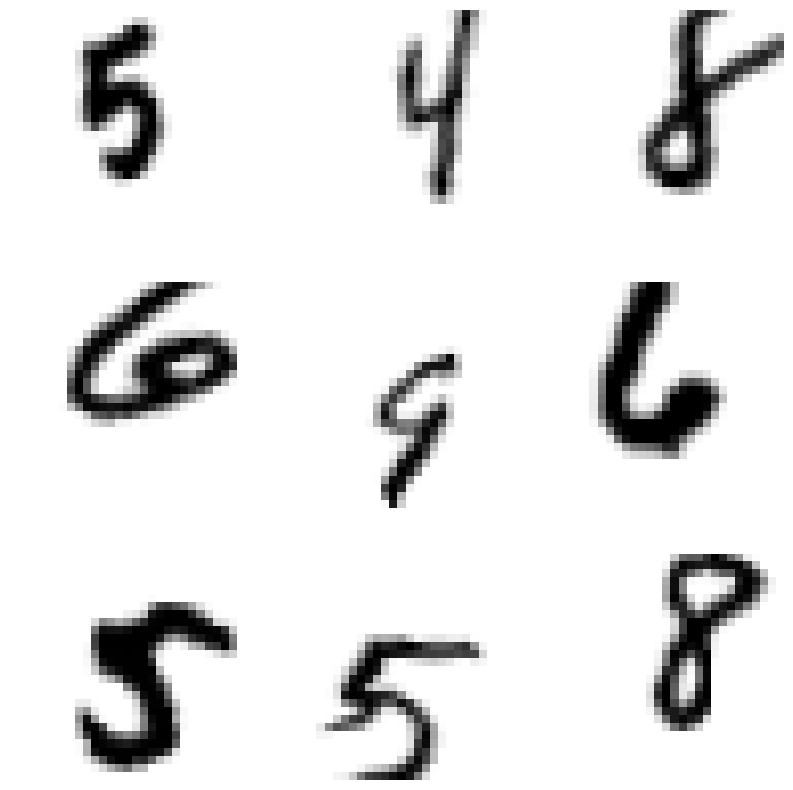

In [54]:
# Generate augmented images
augmented_images = next(datagen.flow(X_train, batch_size=9))

# Plot augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray_r')
    plt.axis('off')
plt.show()

### Task 2.7: Save preproccessed data

In [ ]:
# Unaugmented images
np.savez('../data/mnist_preprocessed.npz', X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test)

In [107]:
data = np.load('../data/mnist_preprocessed.npz')
X_train = data['X_train']
X_test = data['X_test']
X_val = data['X_val']
y_train = data['y_train']
y_test = data['y_test']
y_val = data['y_val']

X_train, y_train = next(datagen.flow(X_train,y=y_train, batch_size=X_train.shape[0]))
X_test, y_test = next(datagen.flow(X_test,y=y_test, batch_size=X_test.shape[0]))
X_val, y_val = next(datagen.flow(X_val, y=y_val,batch_size=X_val.shape[0]))
np.savez('../data/mnist_data_augmented.npz', X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test)

---
---

## Task 3: Designing the CNN Architecture

**Objective:** Design a simple Convolutional Neural Network architecture suitable for handwritten digit recognition.  

**Activities:**

1. Define the CNN layers, including convolutional, activation, pooling, and fully connected layers.  
2. Choose activation functions and initialize weights.  
3. Configure the optimizer, loss function, and metrics for model compilation.  
4. Summarize the model to visualize the architecture and parameters.

**Estimated Completion Time:** 90 minutes

**Hints:**

1. **Start Simple:** Begin with a `Sequential` model from Keras, allowing you to stack layers.
2. **Convolutional Layers:** Add a `Conv2D` layer as the first layer with a modest number of filters (e.g., 32) and a small kernel size (e.g., (3, 3)), followed by an activation function like `ReLU`.
3. **Pooling Layers:** Follow each convolutional layer with a `MaxPooling2D` layer to reduce spatial dimensions.
4. **Flattening:** After the last pooling layer, use a `Flatten` layer to convert the 2D features into a 1D vector.
5. **Dense Layers:** Add a `Dense` layer with `ReLU` activation for learning non-linear combinations of features. The last dense layer should have a softmax activation with a number of neurons equal to the number of classes in the dataset.
6. **Dropout:** Include `Dropout` layers to prevent overfitting, especially before the final dense layers.

### Task 3.1 Build the Sequential Model

In [56]:
def build_model(params):
  '''
   Build a Sequential model with regular densely-connected NN layers.
   Return the constructed model. 
  ''' 
  input_shape = (28, 28, 1)  # 1 is the count of channels (no RGB)
  num_classes=10

  model = keras.Sequential ([ 

    # // The input layer
    layers.Input(shape=input_shape),

    # // Hidden layers
    layers.Conv2D(int(params['filter_1']), kernel_size=(3, 3), activation="relu", name='CL1'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MPL1'),

    layers.Conv2D(int(params['filter_2']), kernel_size=(3, 3), activation="relu", name='CL2'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MPL2'),
      
    layers.Flatten(name='FL'),

    layers.Dense(num_classes, name="DE1", activation='relu'),
  
    layers.Dropout(rate=params['dropout_rate'], name="DP1"),  
    layers.Dense(num_classes, name="DE2", activation='softmax')
  ])

  # Task 3.4 : Summarize model
  model.summary()
  print (model.inputs, model.outputs)

  return model

model = build_model({'filter_1':32, 'filter_2':32, 'dropout_rate':.2, 'epochs':1})

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ CL1 (Conv2D)                    │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MPL1 (MaxPooling2D)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CL2 (Conv2D)                    │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MPL2 (MaxPooling2D)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FL (Flatten)                    │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DE1 (Dense)                     │ (None, 10)             │         8,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DP1 (Dropout)                   │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DE2 (Dense)                     │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,688 (69.09 KB)

 Trainable params: 17,688 (69.09 KB)

 Non-trainable params: 0 (0.00 B)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor_225>] [<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_233>]


In [57]:
def compile_model(model):
  '''
    Compile the pre-built model with the model hyperparameters.
    Return the compiled model
  '''
  model.compile(    
      #optimizer=keras.optimizers.RMSprop(), 
      optimizer=SGD(learning_rate=1e-2, momentum=0.9, nesterov=True),

      # The loss function that we need to minimize
      loss=keras.losses.SparseCategoricalCrossentropy(),  # we have a lot of "holes" in the dataset (the black pixels with a value of 0)
     
      # The metrics (can be more than one) to monitor
      metrics=[keras.metrics.SparseCategoricalAccuracy(), "accuracy"], # The "dangling" comma , before the closing bracket is good practice ...
    
  )

  return model

model = compile_model(model)



## Task 4: Model Training and Evaluation

**Objective:** Train the CNN with the training data and evaluate its performance on the test set.  

**Activities:**

1. Integrate TensorBoard callbacks for real-time tracking of training metrics.
2. Set up callbacks for model checkpoints, early stopping, and learning rate adjustments.  
3. Train the model with the training set while validating on the validation set.  
4. Use TensorBoard to plot training and validation loss and accuracy.  
5. Evaluate the model on the test set to assess its generalization capability.  
6. Perform error analysis by reviewing misclassified images to understand the model's weaknesses.  
7. Test the model with external images (e.g., hand-drawn digits) to further assess its performance.

**Estimated Completion Time:** 300 minutes

**Hints:**

  1. Import the `TensorBoard` callback from `tensorflow.keras.callbacks`.
  2. Utilize the `datetime` module to dynamically generate log directory names based on the current date and time, ensuring each training session's logs are stored separately.
  3. Initialize the `TensorBoard` callback with the `log_dir` specifying the log directory. Setting `histogram_freq=1` configures TensorBoard to record histograms every epoch, enabling the visualization of weights and biases distributions over time.
  4. Use `ModelCheckpoint` to save the model during training. Specify the filename (e.g., 'model.h5') and set `save_best_only=True` to only save the model when its performance on the validation set improves.
  5. Implement `EarlyStopping` to halt training early if the validation performance doesn't improve for a defined number of epochs (`patience`). `restore_best_weights=True` ensures the model reverts to the weights of its best performance.
  6. Use `ReduceLROnPlateau` to automatically reduce the learning rate when the model's improvement on the validation set stalls. Define `patience` for the number of epochs to wait before reducing and `factor` to determine the rate at which the learning rate is reduced.
  7. Use the `model.fit()` method, providing it with the training data (and corresponding labels) along with the validation data.
  8. Specify the number of epochs for the training. An epoch is one complete pass through the entire training dataset.
  9. Pass the list of callbacks (`tensorboard_callback`, `checkpoint_callback`, `early_stopping_callback`, `reduce_lr_callback`) to the `callbacks` parameter of `model.fit()`. This integrates TensorBoard logging, model checkpointing, early stopping, and learning rate reduction into the training process.

### Task 4.1-4: TensorBoard

In [63]:
experiment_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "../logs/" + experiment_name
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
checkpoint_callback = ModelCheckpoint("../models/model_" + experiment_name + ".h5.keras", save_best_only=True)
early_stopping_callback = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr_callback = ReduceLROnPlateau(patience=5, factor=0.1)

In [64]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 128, epochs = 1, verbose=1, callbacks=[tensorboard_callback, checkpoint_callback, early_stopping_callback, reduce_lr_callback])


2024/04/12 15:37:02 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '89a3338e56e144bf84a7183e733db35f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2668 - loss: 1.8580 - sparse_categorical_accuracy: 0.2668 - val_accuracy: 0.9247 - val_loss: 1.0177 - val_sparse_categorical_accuracy: 0.9247 - learning_rate: 0.0100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


### Task 4.5: Evaluate Accuracy

In [65]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9173 - loss: 1.0359 - sparse_categorical_accuracy: 0.9173


[0.992358386516571, 0.932699978351593, 0.932699978351593]

### Task 4.6: Peform Error Analysis

In [66]:
print(X_test.shape)

(10000, 28, 28, 1)


In [67]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


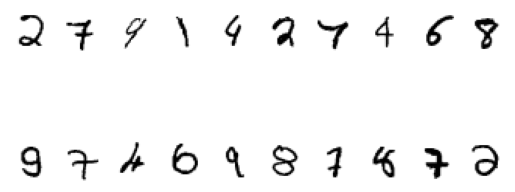

In [68]:

y_pred_labels = np.zeros(len(y_pred), dtype=int)
for i in range(len(y_pred)):
  y_pred_labels[i] = np.argmax(y_pred[i])

count = 0
for i in range(len(y_pred)):
    if y_pred_labels[i] != y_test[i]:
        count+=1
        #print(f"True: {y_test[i]}\t Pred: {y_pred_labels[i]}")
        if count >= 20:
            break

j = 0 
for i in range(len(y_pred)):
    
    if y_pred_labels[i] != y_test[i]:
        j+=1
        plt.subplot(int(count/10)+1, 10, j)
        plt.imshow(X_test[i].reshape(28, 28), cmap='binary')
        plt.axis('off')
    if j >= 20:
        break
plt.show()

In [69]:
cf = tf.math.confusion_matrix(y_pred_labels, y_test)
print (cf)
cf_np = cf.numpy(); cf_np
for r in range(cf_np.shape[0]):
  cf_np[r,r] = 0
print (cf_np)

max_cf = cf_np.max(axis = 1); max_cf

for r in range(cf_np.shape[0]):
   m = np.argmax(cf_np[r])
   print (f'{r} was confused for {m} {cf_np[r,m]} times...')

tf.Tensor(
[[ 971    1    1    0    1    5   18    0    8    4]
 [   1 1114   14    0   13    0    4   39    3    7]
 [   0   10  956    3    1    1    0   25   10    1]
 [   0    1   26  972    0   32    0    1   20    9]
 [   0    8    4    1  841    2    1    0   18   17]
 [   0    0    0   18    1  839    3    0   16   25]
 [   3    1    3    0    8    7  930    0   11    1]
 [   4    0   11    6    2    1    0  912    8    8]
 [   1    0   15    4    3    2    2    2  857    2]
 [   0    0    2    6  112    3    0   49   23  935]], shape=(10, 10), dtype=int32)
[[  0   1   1   0   1   5  18   0   8   4]
 [  1   0  14   0  13   0   4  39   3   7]
 [  0  10   0   3   1   1   0  25  10   1]
 [  0   1  26   0   0  32   0   1  20   9]
 [  0   8   4   1   0   2   1   0  18  17]
 [  0   0   0  18   1   0   3   0  16  25]
 [  3   1   3   0   8   7   0   0  11   1]
 [  4   0  11   6   2   1   0   0   8   8]
 [  1   0  15   4   3   2   2   2   0   2]
 [  0   0   2   6 112   3   0  49  23   0

### Task 4.7: Test on our own handrawn data

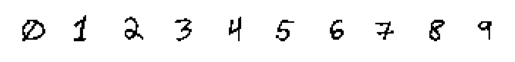

In [129]:
from PIL import Image
thresh = 180
images = []
np_images = np.zeros((10, 28, 28))


for i in range(0, 10):
    if not os.path.isfile(f"../images/{i}.png"):
        print("ERROR: image files not found")
        break
    
    images.append(Image.open(f"../images/{i}.png"))
    
    images[i] = images[i].resize((28, 28))

    fn = lambda x : 255 if x < thresh else 0
    images[i] = images[i].convert('L').point(fn)
    np_images[i] = np.array(images[i])
    
    plt.subplot(1, 10, i+1)
    plt.imshow(images[i], cmap='binary')
    plt.axis('off')



In [71]:
np_images = np_images / 255 ; 
np_images = np_images.reshape(np_images.shape[0], np_images.shape[1], np_images.shape[2], 1)

In [72]:
y_pred = model.predict(np_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [73]:
y_pred_labels = np.zeros(len(y_pred), dtype=int)
for i in range(len(y_pred)):
  y_pred_labels[i] = np.argmax(y_pred[i])
  print(f"{i}\t{y_pred_labels[i]}")

0	6
1	2
2	2
3	3
4	9
5	5
6	5
7	9
8	5
9	9


#### Observations
The model accurately predicts all of the provided numbers except for 7, but I draw my 7's with a crossbar which is likely not in the training data. 

---
---


## **Task 5: Results Analysis and Model Tuning**  

**Objective:** Analyze the results and refine the model for better performance.  

**Activities:**

1. Use TensorBoard to perform detailed analysis of model performance, including confusion matrices and histograms of model weights.
2. Investigate layer activations and feature maps to understand what the model is learning.
3. Experiment with different architectures using `model.get_config()` and hyperparameters to improve performance.
4. Apply techniques like dropout and batch normalization to mitigate overfitting.
5. Evaluate the effects of data augmentation on model robustness using TensorBoard.
6. Conduct ablation studies, using TensorBoard to track and compare results.

**Estimated Completion Time:** 240 minutes



**Hints:**
  1. Ensure that TensorBoard callbacks were integrated during the training process to log metrics, weights, and other important training information.
  2. Use the `%load_ext tensorboard` and `%tensorboard --logdir logs/fit` commands to view TensorBoard within a Jupyter notebook or use the command line for a standalone script.
  3. Focus on the histograms and distributions of model weights to understand the learning process, and use confusion matrices to identify specific areas where the model is underperforming.
  4. Create a new model (`activation_model`) that outputs the activations of all layers using the original model's inputs and outputs.
  5. Use this `activation_model` to predict a single image's activations, effectively visualizing what each layer is focusing on or detecting in the image.
  6. Visualize these activations to gain insights into the model's decision-making process.
  7. Utilize `model.get_config()` to extract the current model's configuration.
  8. Modify this configuration to experiment with different architectures, such as changing the number of filters in convolutional layers, units in dense layers, or adding new layers.
  9. Use `models.Sequential.from_config(new_config)` to rebuild the model with the new configuration and recompile it.
  10. Experiment with different optimizers, learning rates, batch sizes, and other trainable parameters.
  11. For each experiment, set up a separate TensorBoard log directory to compare performances across different configurations.
  12. Incorporate dropout layers into the model to randomly ignore a subset of neurons during training, which helps prevent co-adaptations.
  13. Use batch normalization to normalize the inputs of each layer, stabilizing and speeding up training.
  14. Use TensorBoard to compare models trained with and without data augmentation, focusing on validation accuracy and loss.
  15. Adjust data augmentation parameters based on these insights to find the optimal balance that improves model generalizability without introducing too much noise.
  16. Remove or alter specific layers, activations, or other model components.
  17. Use TensorBoard to track how these changes affect training dynamics and final model performance.
  18. Compare different model configurations in TensorBoard by inspecting the learning curves and other relevant metrics.

**Additional Insights:**
- **TensorBoard Specifics:** When analyzing results in TensorBoard, pay particular attention to:
  - **Learning Curves:** Look for signs of overfitting or underfitting, such as diverging training and validation loss curves. A good model will show both losses decreasing in tandem.
  - **Confusion Matrix:** Identify which classes are most frequently misclassified. This can indicate if the model struggles with similar-looking digits or has insufficient examples for certain classes.
  - **Weight Histograms:** Observe the distribution of weights and biases over time. Well-trained models should show weights moving towards a stable distribution, not exploding or vanishing.
  - **Activation Distributions:** Review how activations change across layers. Ideally, activations should not be all zero or saturate, as this could indicate dead neurons or ineffective learning.
- Visualizing these aspects can guide adjustments to the architecture, training process, or data handling, directly impacting model performance and efficiency.
- **Iterative Improvement:** The tuning process is iterative and requires balancing multiple factors, including model complexity, training time, and available computational resources. Use insights from TensorBoard to make informed decisions on what to adjust in subsequent experiments.

### Task 5.1: Use Tensorboard

In [123]:
def objective(params):
    """
    Purpose - Function to optimize model performance
    Input - Params: Dict with variables and search space to vary 
            x_train: training data X
            y_train: training data Y
    """
    
    if 'augmented' not in params.keys() or params['augmented'] is False:
        augmented = False
        data = np.load('../data/mnist_preprocessed.npz')   

    else:
        augmented = True
        data = np.load('../data/mnist_data_augmented.npz')

        
    if 'epochs' not in params.keys():
        epochs = 5
    else:
        epochs = params['epochs']
        
    
    if 'augmented' not in params.keys() or params['augmented'] is False:
        data = np.load('../data/mnist_preprocessed.npz')   
    else:
        data = np.load('../data/mnist_data_augmented.npz')

    
    X_train = data['X_train']
    X_test = data['X_test']
    X_val = data['X_val']
    y_train = data['y_train']
    y_test = data['y_test']
    y_val = data['y_val']
    
    experiment_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    if augmented:
        experiment_name = experiment_name + "_aug"
    
    mlflow.set_experiment(experiment_name)
    experiment = mlflow.get_experiment_by_name(experiment_name)
        
    with mlflow.start_run():
        
        # Build the model
        model = build_model(params)
        
        mlflow.log_param("filter_1", params['filter_1'])
        mlflow.log_param("filter_2", params['filter_2'])
        mlflow.log_param("dropout_rate", params['dropout_rate'])
        
        # Compile the model
        model = compile_model(model)
        
        mlflow.tensorflow.autolog()
        
        # Tensorboard integration
        log_dir = "../logs/" + experiment_name
        tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_images=True)
        checkpoint_callback = ModelCheckpoint("../models/model_" + experiment_name + ".h5.keras", save_best_only=True)
        early_stopping_callback = EarlyStopping(patience=5, restore_best_weights=True)
        reduce_lr_callback = ReduceLROnPlateau(patience=5, factor=0.1)

        # Train the model 
        history = model.fit(X_train, y_train, batch_size = 256, epochs = epochs, verbose=0, validation_data=(X_val, y_val), callbacks=[tensorboard_callback, checkpoint_callback, early_stopping_callback, reduce_lr_callback])
        model.save("../models/model_" + experiment_name + "_trained.h5.keras")

     #model.summary()
    val_loss = history.history['val_loss'][-1]
    return {'loss': val_loss, 'status': STATUS_OK}

In [121]:
search_space = {
    'dropout_rate': hp.uniform('dropout_rate', 0.2, 0.3),
    'filter_1': hp.quniform('filter_1',16,512, 8),
    'filter_2': hp.quniform('filter_2',16, 512, 8)
}

trials = Trials()

best = fmin(fn=objective,
            space=search_space,
            algo=tpe.suggest,
            max_evals=1,
            trials=trials)

  0%|                                          | 0/1 [00:00<?, ?trial/s, best loss=?]

2024/04/12 16:59:25 INFO mlflow.tracking.fluent: Experiment with name '20240412-165925' does not exist. Creating a new experiment.



Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ CL1 (Conv2D)                    │ (None, 26, 26, 144)    │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MPL1 (MaxPooling2D)             │ (None, 13, 13, 144)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CL2 (Conv2D)                    │ (None, 11, 11, 488)    │       632,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MPL2 (MaxPooling2D)             │ (None, 5, 5, 488)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FL (Flatten)                    │ (None, 12200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DE1 (Dense)                     │ (None, 10)             │       122,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DP1 (Dropout)                   │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DE2 (Dense)                     │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 756,496 (2.89 MB)

 Trainable params: 756,496 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor_324>]
[<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_332>] 
  0%|                                          | 0/1 [00:00<?, ?trial/s, best loss=?]

2024/04/12 16:59:25 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step             
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step            

100%|█████████████████| 1/1 [01:31<00:00, 91.95s/trial, best loss: 0.111339271068573]


### Task 5.5: Compare original vs Augmented data

In [124]:
params = {
    'dropout_rate': .2,
    'filter_1': 200,
    'filter_2': 200,
    'augmented': True,
    'epochs':10
}

trials = Trials()

best = fmin(fn=objective,
            space=params,
            algo=tpe.suggest,
            max_evals=1,
            trials=trials)

params = {
    'dropout_rate': .2,
    'filter_1': 200,
    'filter_2': 200,
    'augmented': False,
    'epochs':10
}

trials = Trials()

best = fmin(fn=objective,
            space=params,
            algo=tpe.suggest,
            max_evals=1,
            trials=trials)

  0%|                                          | 0/1 [00:00<?, ?trial/s, best loss=?]

2024/04/12 17:08:22 INFO mlflow.tracking.fluent: Experiment with name '20240412-170822_aug' does not exist. Creating a new experiment.



Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ CL1 (Conv2D)                    │ (None, 26, 26, 200)    │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MPL1 (MaxPooling2D)             │ (None, 13, 13, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CL2 (Conv2D)                    │ (None, 11, 11, 200)    │       360,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MPL2 (MaxPooling2D)             │ (None, 5, 5, 200)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FL (Flatten)                    │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DE1 (Dense)                     │ (None, 10)             │        50,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DP1 (Dropout)                   │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DE2 (Dense)                     │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,320 (1.57 MB)

 Trainable params: 412,320 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor_351>]
[<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_359>] 
  0%|                                          | 0/1 [00:00<?, ?trial/s, best loss=?]

2024/04/12 17:08:22 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step              
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step              

  0%|                                          | 0/1 [00:00<?, ?trial/s, best loss=?]

2024/04/12 17:10:25 INFO mlflow.tracking.fluent: Experiment with name '20240412-171025' does not exist. Creating a new experiment.



Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ CL1 (Conv2D)                    │ (None, 26, 26, 200)    │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MPL1 (MaxPooling2D)             │ (None, 13, 13, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CL2 (Conv2D)                    │ (None, 11, 11, 200)    │       360,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MPL2 (MaxPooling2D)             │ (None, 5, 5, 200)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FL (Flatten)                    │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DE1 (Dense)                     │ (None, 10)             │        50,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DP1 (Dropout)                   │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DE2 (Dense)                     │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,320 (1.57 MB)

 Trainable params: 412,320 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor_360>]
[<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_368>] 
  0%|                                          | 0/1 [00:00<?, ?trial/s, best loss=?]

2024/04/12 17:10:25 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step              
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step              

100%|██████████████| 1/1 [02:05<00:00, 125.09s/trial, best loss: 0.06449055671691895]


### Observations

1. Accuracy significantly improves with a lower dropout rate, closer to .2. 
2. We have not observed an improved accuracy with more or less neurons. 

---
---



## **Task 6: Model Deployment and Documentation**  

**Objective:** Prepare the model for deployment using MLflow and document the project for reproducibility and sharing. Create and test an API endpoint for the model using Postman.

**Activities:**

1. Convert the trained model into a MLflow-compatible format and log the model in MLflow.
2. Set up MLflow tracking server to manage and store model artifacts.
3. Develop a Flask or FastAPI application that loads the MLflow model and creates an API endpoint for making predictions.
4. Test the API endpoint locally to ensure it is working as expected.
5. Use MLflow to package the API application into a Docker container for easy deployment and scaling.
6. Write comprehensive documentation, detailing the steps for model conversion, MLflow integration, API usage, and deployment process.
7. Use Postman to create and send requests to the deployed API endpoint, validating the model's responses and functionality.
8. Create a GitHub repository to host the project code, MLflow tracking information, documentation, and deployment instructions.

**Estimated Completion Time:** 240 minutes

---
---


In [ ]:
from fastapi import FastAPI
import mlflow.pyfunc
import uvicorn

app = FastAPI()


@app.get("/")
async def root():
    return {"message": "Hello World"}